# **Modelo de clasificacion de la posición inicial del ejercicio press militar con mancuernas**



In [1]:
# importar librerias necesarias

from tensorflow.keras.preprocessing.image import ImageDataGenerator   # Genera datos de imágenes con aumento
from tensorflow.keras.layers import Dropout                           # Aplica Dropout para prevenir el sobreajuste
from tensorflow.keras.layers import Flatten                           # Aplana la entrada
from tensorflow.keras.layers import Dense                             # Añade una capa densa
from tensorflow.keras.layers import Input                             # Inicializa un tensor de Keras
from tensorflow.keras.models import Model                             # Agrupa capas en un modelo
from tensorflow.keras.models import Sequential                         #Nos ayuda a hacer redes neuronales secuenciales
from tensorflow.keras.layers import Convolution2D, MaxPooling2D        #Capas para las convolusiones
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # Preprocesa imágenes
from tensorflow.keras.preprocessing.image import img_to_array           # Convierte imagen a arreglo
from tensorflow.keras.preprocessing.image import load_img               # Carga imagen en formato PIL
from tensorflow.keras.preprocessing import image                        # Utilidades de preprocesamiento de imagen
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer                        # Binariza etiquetas
from sklearn.model_selection import train_test_split                    # Divide datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import classification_report                       # Reporte de métricas de clasificación
import matplotlib.pyplot as plt
import numpy as np
import cv2                                                               # Librería de visión computarizada OpenCV
from PIL import Image                                                    # Librería de imágenes de Python
import os                                                                # Funcionalidades dependientes del sistema operativo
import pandas as pd                                                      # Herramienta de manipulación y análisis de datos
import seaborn as sns                                                    # Librería de visualización de datos estadísticos
import shutil                                                            # Operaciones de alto nivel para archivos
from google.colab import drive                                           # Monta Google Drive en Google Colab
import zipfile                                                           # Manipular archivos zip
import matplotlib.image as mpimg                                         # Importa el módulo para leer imágenes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [2]:
#Monta drive en colab
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Extrae un archivo ZIP a una ruta content

ruta_archivo_zip = '/content/drive/MyDrive/DATASET_Z_2.zip'
ruta_destino = '/content'

with zipfile.ZipFile(ruta_archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(ruta_destino)


In [4]:
#Crear carpetas para hacer el set de datos

!mkdir /content/DATASET
!mkdir /content/DATASET/CORRECTO
!mkdir /content/DATASET/INCORRECTO


In [5]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/DATASET_Z_1/CORRECTO | wc -l
!ls /content/DATASET_Z_1/INCORRECTO | wc -l

900
954


In [6]:
#Se copia a las carpetas para manipularlas

carpeta_fuente = '/content/DATASET_Z_1/INCORRECTO'
carpeta_destino = '/content/DATASET/INCORRECTO'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 900:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [7]:

carpeta_fuente = '/content/DATASET_Z_1/CORRECTO'
carpeta_destino = '/content/DATASET/CORRECTO'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 900:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [8]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/DATASET/CORRECTO | wc -l
!ls /content/DATASET/INCORRECTO | wc -l

900
900


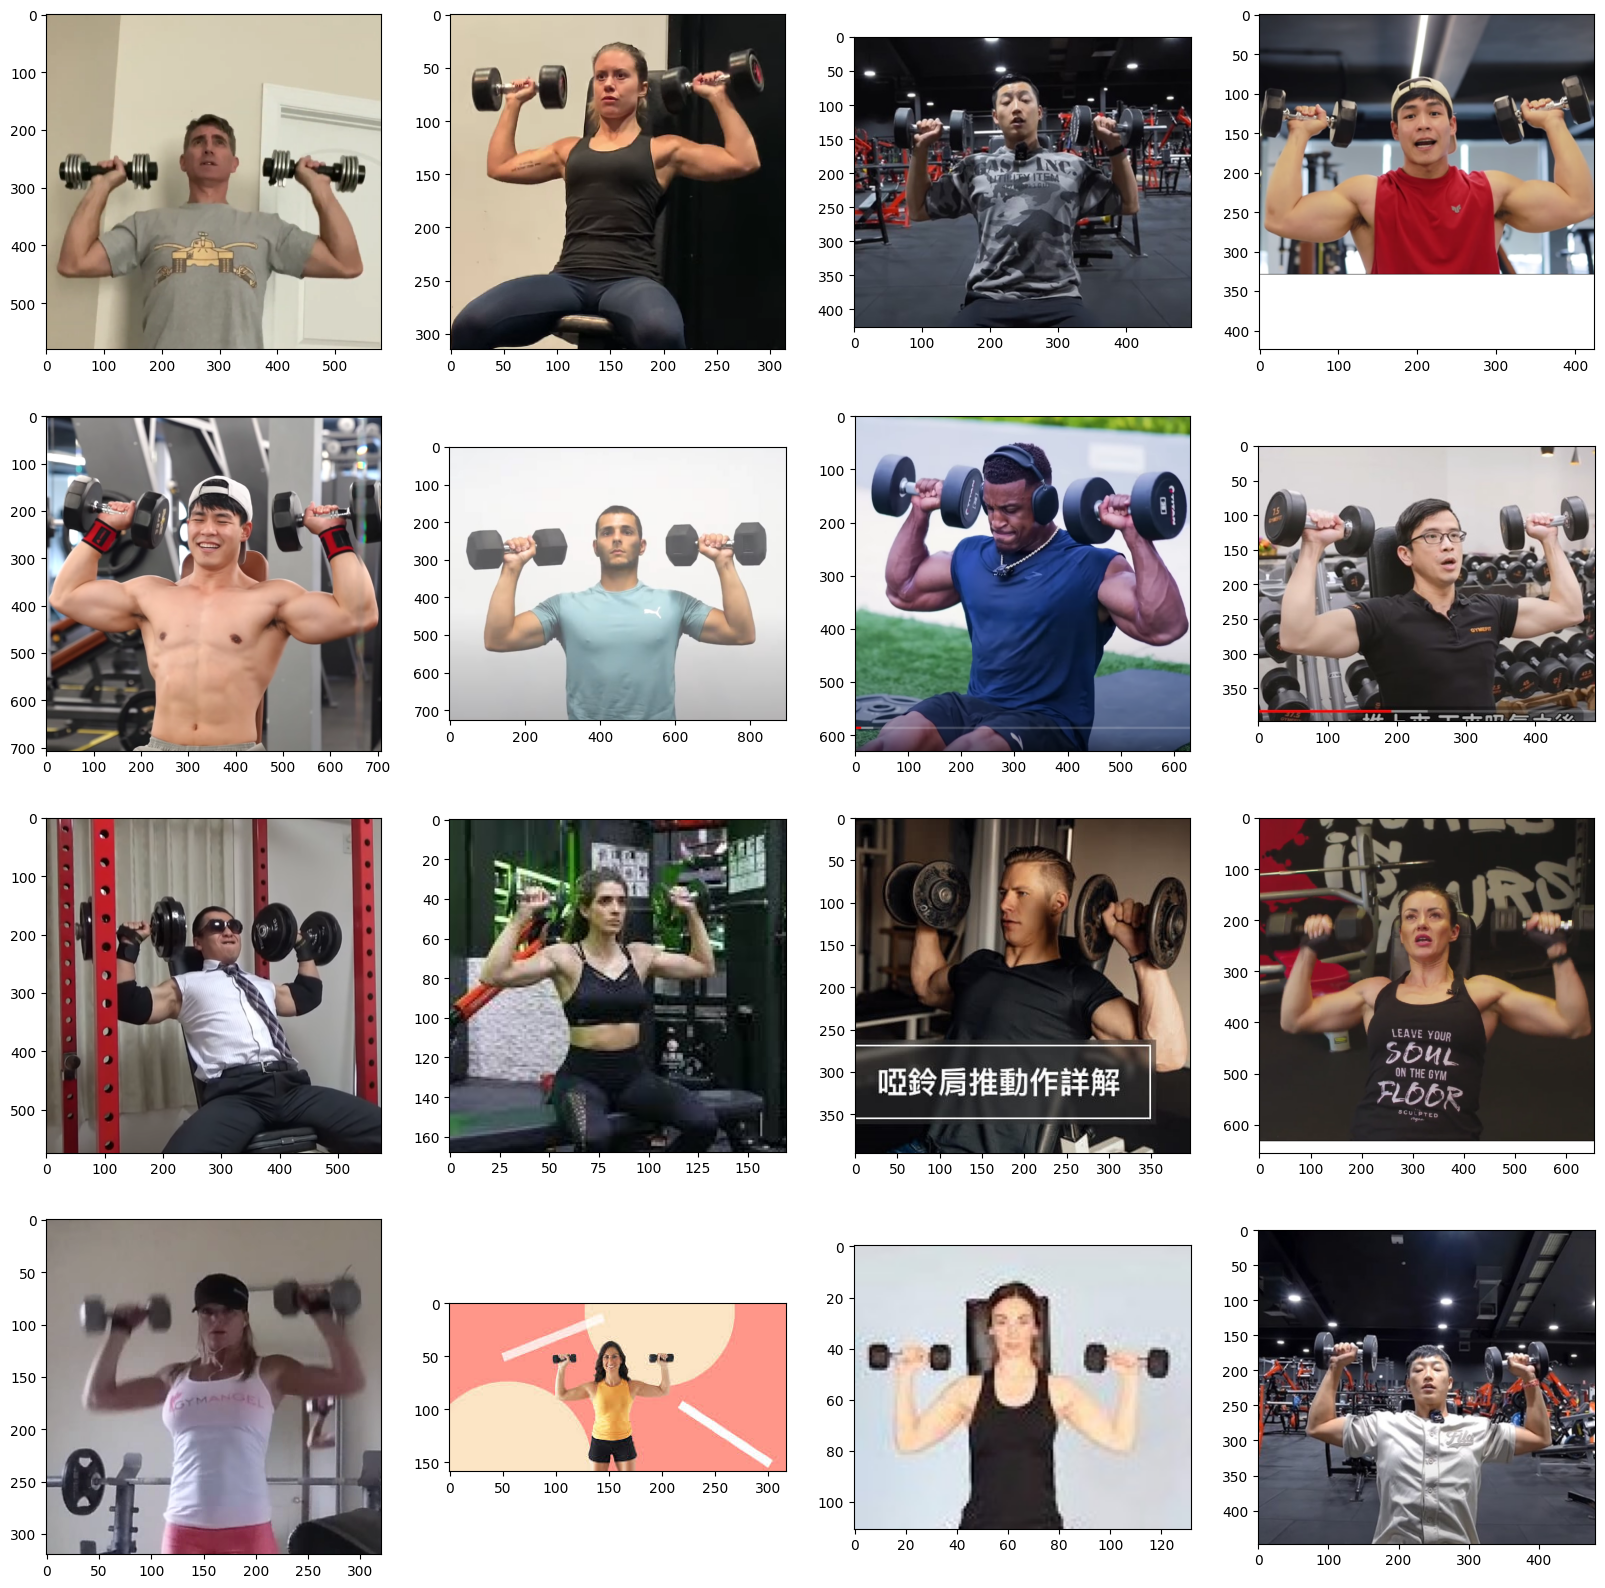

In [9]:
#Mostrar imagenes dentro de carpeta correcto

plt.figure(figsize=(20,20))

carpeta='/content/DATASET/CORRECTO'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:16]):
    plt.subplot(4, 4, i+1)
    imagen = mpimg.imread(carpeta + '/' + nombreimg) #/content/DATASET/CORRECTO/nombreimg
    plt.imshow(imagen)

In [10]:
#Carga imágenes desde un directorio y configura
def load_data_from_directory(directory, categories):
    data = []  #imágenes
    labels = [] #etiquetas

    for category in categories:
        category_path = os.path.join(directory, category)
        for img in os.listdir(category_path):
            img_path = os.path.join(category_path, img)
            image = load_img(img_path, target_size=(128, 128))   # Carga la imagen y la ajusta al tamaño deseado
            image = img_to_array(image)                          # Convierte la imagen a un arreglo de Numpy
            image = preprocess_input(image)                      # Preprocesa la imagen para el modelo
            data.append(image)                                   # Añade la imagen preprocesada a la lista de datos
            labels.append(category)                              # Añade la etiqueta de la categoría a la lista de etiquetas

    return data, labels  # Devuelve las listas de datos e etiquetas

In [11]:
# Define la ruta hacia el directorio con los datos y las categorías a cargar
data_path = "/content/DATASET"
categories = ["CORRECTO", "INCORRECTO"]

# Carga los datos y etiquetas utilizando la función definida
data, labels = load_data_from_directory(data_path, categories)

# Divide los datos cargados y sus etiquetas en conjuntos de entrenamiento y prueba
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [12]:
#Logintud de la data train y test
print(len(data_train))
print(len(data_test))

1440
360


In [13]:
X_train = data_train
X_test = data_test
y_train = labels_train
y_test = labels_test

In [14]:
y_train

['INCORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'CORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'CORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'CORRECTO',
 'CORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'CORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'CORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'CORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'CORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'INCORRECTO',
 'CORRECTO',
 'INCORRECTO',
 'CORRECT

In [15]:
#Binarizacion de etiquetas CORRECTO=0 INCORRECTO=1
lb = LabelBinarizer()
Y_train = lb.fit_transform(y_train)
Y_test = lb.fit_transform(y_test)

In [16]:
Y_train

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [17]:
# Dar formato numérico uniforme facilita el manejo de los datos para el aprendizaje
# Convierte la lista X_train en un array de NumPy de tipo float32

X_train= np.array(X_train, dtype="float32")
X_test= np.array(X_test, dtype="float32")


In [18]:
# Aumento de datos, cambios sutiles
augmentation = ImageDataGenerator(
    zoom_range=[0.97,1.02],         # Generar imágenes con zoom
    width_shift_range=[0.02,0.04],  # Mover imagen en eje x
    height_shift_range=[0.02,0.06], # Mover imagen en eje y
    horizontal_flip=True,           # Invierte las imágenes (aplica modo espejo)
    fill_mode="nearest"             # Rellenar el espacio generado al mover la imagen
)

In [19]:
# Variables para entrenamiento

num_epochs = 30
bs = 1
base_rate = 0.00005

In [20]:
# Creamos la red neuronal secuencial
cnn = Sequential()

# Agregamos la primera capa convolucional con 16 filtros de tamaño 3x3, especificando el tamaño de entrada de las imágenes
cnn.add(Convolution2D(16, (3,3), input_shape = (128,128,3), activation = 'relu'))
cnn.add(MaxPooling2D(2,2))

# Agregamos más capas convolucionales con un número creciente de filtros y activación ReLU para introducir no linealidad
cnn.add(Convolution2D(32, (3,3),  activation = 'relu'))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Convolution2D(64, (3,3), activation = 'relu'))
cnn.add(MaxPooling2D(2,2))

cnn.add(Convolution2D(128, (3,3), activation = 'relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.5)) # Dropout desactiva aleatoriamente el 50% de las conexiones entre las capas para prevenir el overfitting

cnn.add(Flatten()) # Aplanamos la salida para convertirla convirtiendo los datos de entrada multidimensionales a un vector unidimensional

cnn.add(Dense(200, activation = 'relu'))
cnn.add(Dense(100, activation = 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(50, activation = 'relu'))
cnn.add(Dropout(0.4))

# La capa de salida tiene una sola neurona con activación sigmoidal para la clasificación binaria
cnn.add(Dense(1, activation = 'sigmoid'))


In [21]:
#Optimizador Adam
adam = Adam(learning_rate=base_rate)

#Función de pérdida, optimizador y métricas
cnn.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

In [22]:
#Entrenamiento

cnn.fit(
    augmentation.flow(X_train, Y_train, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // bs,
    epochs=num_epochs)

Epoch 1/30
1440/1440 [==============================] - 22s 10ms/step - loss: 0.6951 - accuracy: 0.5243 - val_loss: 0.6855 - val_accuracy: 0.5250
Epoch 2/30
1440/1440 [==============================] - 13s 9ms/step - loss: 0.6896 - accuracy: 0.5424 - val_loss: 0.6664 - val_accuracy: 0.6806
Epoch 3/30
1440/1440 [==============================] - 13s 9ms/step - loss: 0.6597 - accuracy: 0.6069 - val_loss: 0.6022 - val_accuracy: 0.7000
Epoch 4/30
1440/1440 [==============================] - 13s 9ms/step - loss: 0.6181 - accuracy: 0.6660 - val_loss: 0.5462 - val_accuracy: 0.7528
Epoch 5/30
1440/1440 [==============================] - 13s 9ms/step - loss: 0.5810 - accuracy: 0.6840 - val_loss: 0.5110 - val_accuracy: 0.7806
Epoch 6/30
1440/1440 [==============================] - 13s 9ms/step - loss: 0.5612 - accuracy: 0.7167 - val_loss: 0.5110 - val_accuracy: 0.7472
Epoch 7/30
1440/1440 [==============================] - 13s 9ms/step - loss: 0.5250 - accuracy: 0.7333 - val_loss: 0.5435 - val_a

In [23]:
cnn.save("Modelo_sigmoid.h5")
cnn.save_weights("Peso_sigmoid.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


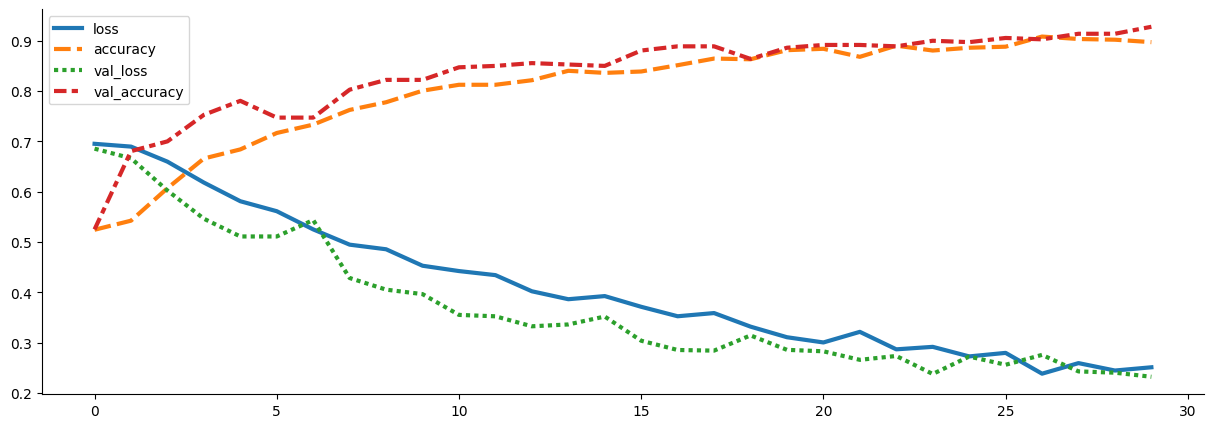

In [24]:
loss = pd.DataFrame(cnn.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data = loss, lw = 3)
sns.despine()

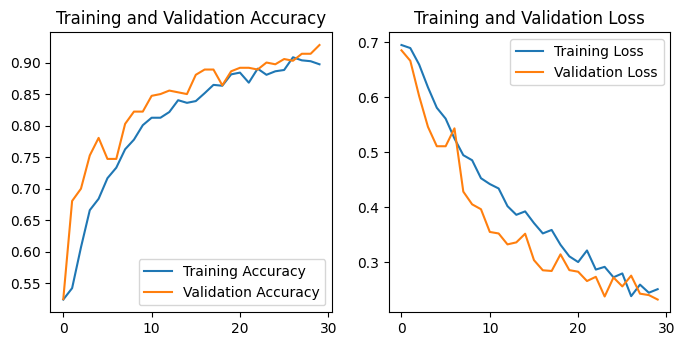

In [25]:
acc = cnn.history.history['accuracy']
val_acc = cnn.history.history['val_accuracy']

loss = cnn.history.history['loss']
val_loss = cnn.history.history['val_loss']
epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
y_pred_test = cnn.predict(X_test)
y_pred_train = cnn.predict(X_train)

45/45 [==============================] - 0s 4ms/step


In [27]:
y_pred_test = (y_pred_test > 0.5).astype(int)
y_pred_train = (y_pred_train > 0.5).astype(int)

In [28]:

confusion_mtx_train = confusion_matrix(Y_train, y_pred_train)
print(confusion_mtx_train)


[[686  28]
 [ 50 676]]


In [29]:

confusion_mtx_test = confusion_matrix(Y_test, y_pred_test)
print(confusion_mtx_test)

[[170  16]
 [ 10 164]]


In [30]:


classification_rep = classification_report(Y_train, y_pred_train)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.93      0.96      0.95       714
           1       0.96      0.93      0.95       726

    accuracy                           0.95      1440
   macro avg       0.95      0.95      0.95      1440
weighted avg       0.95      0.95      0.95      1440



In [31]:

classification_rep = classification_report(Y_test, y_pred_test)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.94      0.91      0.93       186
           1       0.91      0.94      0.93       174

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360

